<a href="https://colab.research.google.com/github/ProfessorPatrickSlatraigh/CST2312_H11/blob/main/CST2312_H11_Class25_pandasBasics_NYC_BoH_restaurants.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CST2312 - Information and Data Management I**
#NYC Open Data - Board of Health: Restaurant Inspections

**Week #15**    
**Class #25**    

A copy of this workbook is available at https://bit.ly.cst2312cl25

*revisions: Apr 2022 | Dec 2022 | May 2023 | Apr 2024 | Dec 2025*


## Pandas Basics  
**<u>NYC DOH Restaurant Inspection Data</u>**

## Setup and preliminaries

To read and process files, there is a  very powerful, and widely used Python library, called pandas. This notebook will import the **pandas** library in Python, and also import the following libraries to use with pandas data:

* **matplotlib** - for generating plots    
* **numpy** - for calculations on the data    



In [ ]:
# assemble libraries
import pandas as pd  # import pandas library for dataframe functionality
import matplotlib # import matplotlib for data visualization (graphs)
import numpy as np # import numpy for calculations on the data

*note: for additional plotting functionality, the library **Seaborn** may be imported as well.*

# Data Types and Conversions

## Loading Data

### From CSV Files

NOTE -- EXPLAIN !CURL WITH RAW GITHUB EXAMPLE OF COVID HOSPITAL DATA

In [ ]:
!curl 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/hospitalizations/covid-hospitalizations.csv' -o hospitals.csv

This notebook uses a dataset with [restaurant inspection results in NYC](https://data.cityofnewyork.us/Health/DOHMH-New-York-City-Restaurant-Inspection-Results/43nn-pn8j) which is available online from the City of New York.

Fetching a file to download in a Google Colab notebook results in the downloaded file residing in the '**sample_data/**' folder in the active Colab session.  That is a volatile copy which will not persist after the Colab session is closed.

This notebook fetchs the data using the [Linux curl command](https://www.geeksforgeeks.org/curl-command-in-linux-with-examples/) by executing the following command with the parameters **"-o"** and **"restaurant.csv"** to specify * file name to save the result:

In [ ]:
# Fetches the most recent dataset
!curl 'https://data.cityofnewyork.us/api/views/43nn-pn8j/rows.csv?accessType=DOWNLOAD' -o restaurant.csv

To be able to read and process this file within Python, the pandas library has a very convenient method `read_csv` which reads the file, and returns back a DataFrame object that contains its contents.  The following code creates a DataFrame variable **restaurants** with the results of the Pandas **'.read_csv()'** function.

In [ ]:
restaurants = pd.read_csv(
    "restaurant.csv",
    encoding="utf_8",
    dtype="unicode",
    parse_dates=True,
    # infer_datetime_format=True,
    low_memory=False,
)

Using **'.read_csv()'** to read a CSV file (or TSV file), results in an object called a DataFrame, which is made up of rows and columns. DataFrame columns are accessed the same way as elements from a dictionary. Using the **restaurant** DataFrame object, the first five rows and the columns of data can be displayed with the **'.head(5)'** method:

In [ ]:
restaurants.head(5)

The **'.read_csv()'** method has many options.  See the [online documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.io.parsers.read_csv.html) for details.

In [ ]:
restaurants.SCORE.tail()



---



## Data Assessment and Transformations

### More DataFrame Exploration

The data types can be displayed for each column (variable) with **'.dtypes'**

In [ ]:
restaurants.dtypes

The method **'.describe()'** method yields a quick overview of the data in the dataframe.

In [ ]:
restaurants.describe()

To describe output list as a column of variables with the count, # unique values, top, and frequency as columns, transpose the result from the **'.describe()'** method using **'.T'**.

In [ ]:
# Same as above, but the .T command transposes the table
restaurants.describe().T



---



The `object` type is a string as a result of reading a CSV. Many of these objects may be more useful changed to other data types. The **`pd.to_numeric`** and **`pd.to_datetime`** functions are two methods for changing dataframe columns to another type as the following code demonstrates.

### Converting Data Types to Numeric

The `object` type is a string. To convert an object to numeric, use the **`pd.to_numeric()`** function, as shown below:

In [ ]:
restaurants["SCORE"] = pd.to_numeric(restaurants["SCORE"])
restaurants["Latitude"] = pd.to_numeric(restaurants["Latitude"])
restaurants["Longitude"] = pd.to_numeric(restaurants["Longitude"])
restaurants.dtypes



---



In [ ]:
restaurants.SCORE.tail(15)

###  Converting Data to Dates

Converting appropriate columns into the date data type follows.

* What do you recall about datetime values in Pandas?    
* What are two types of datetime value?



In [ ]:
restaurants["GRADE DATE"] = pd.to_datetime(restaurants["GRADE DATE"])
restaurants["RECORD DATE"] = pd.to_datetime(restaurants["RECORD DATE"])
restaurants["INSPECTION DATE"] = pd.to_datetime(restaurants["INSPECTION DATE"])
restaurants.dtypes

#### Note


In tricky cases, there may be a need to pass the `format` parameter, specifying the formatting of the date. To understand first how to [parse dates using  Python conventions](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior).




---



### Converting Data to Categorical Variables

This is less important, but sometimes variables are best to be formatted as "Categorical". This is most commonly useful when we have variables that have an implicit order (e.g., the A/B/C grade of the restaurant).  Where this categorization is applicable, it can be helpful in charting (bar charts, etc.)  It is also important to recognize categorical variables if planning to conduct correlation analysis at some point.

In [ ]:
restaurants["BORO"] = pd.Categorical(restaurants["BORO"], ordered=False)
restaurants["GRADE"] = pd.Categorical(
    restaurants["GRADE"], categories=["A", "B", "C"], ordered=True
)
restaurants["VIOLATION CODE"] = pd.Categorical(
    restaurants["VIOLATION CODE"], ordered=False
)
restaurants["CRITICAL FLAG"] = pd.Categorical(
    restaurants["CRITICAL FLAG"], ordered=False
)
restaurants["ACTION"] = pd.Categorical(restaurants["ACTION"], ordered=False)
restaurants["CUISINE DESCRIPTION"] = pd.Categorical(
    restaurants["CUISINE DESCRIPTION"], ordered=False
)

restaurants["INSPECTION TYPE"] = pd.Categorical(
    restaurants["INSPECTION TYPE"], ordered=False
)

restaurants.dtypes



---



## Descriptive Statistics



### Descriptive Statistics for Numeric Variables


#### Basic descriptive statistics for numeric variables

Given that SCORE is a numeric variable, more detailed descriptive statistics for the variable are available using the **`.describe()`** method:

In [ ]:
restaurants["SCORE"].describe()

### Descriptive Statistics for Dates


In [ ]:
restaurants[["INSPECTION DATE", "GRADE DATE", "RECORD DATE"]].describe()

In addition to running a list of columns, we can look at each column individually.

In [ ]:
restaurants["INSPECTION DATE"].describe()

In [ ]:
restaurants["GRADE DATE"].describe()

In [ ]:
restaurants["RECORD DATE"].describe()

### Descriptive Statistics for Categorical/string columns

Quick statistics about the common values that appear in each column are available with the **`.value_counts()`** method:

In [ ]:
restaurants["DBA"].value_counts()

In [ ]:
restaurants["BORO"].value_counts()

In [ ]:
restaurants["CUISINE DESCRIPTION"].value_counts()

In [ ]:
nycCuisines = restaurants["CUISINE DESCRIPTION"].value_counts()

In [ ]:
type(nycCuisines)

In [ ]:
nycCuisines.head(10)



---



# Basic Data Manipulation Techniques

## Selecting a subset of the columns -- `filter()`

It is possible in a dataframe to specify the column(s) to keep, and get back another dataframe with just that subset of the columns as the result using
[the **`.filter()`** method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.filter.html)

In [ ]:
restaurants

In [ ]:
restaurants.filter(
    items = ["DBA", "GRADE", "GRADE DATE"]
)

In [ ]:
columns = ["GRADE DATE", "VIOLATION CODE", "DBA", "SCORE"]

# Notice the use of "chain notation" below
# Chain notation means putting parentheses around
# the command and then having each operation in its
# own line
(
  restaurants
  .filter( items = columns )
  .head(10)
)


Use the **`like`** option in `filter()` to find all the column names that include a certain string. For example, to get all the columns that include the string `DATE`:

In [ ]:
restaurants.filter(
    like = 'DATE'
)

The functionality of `filter()` is greatly expanded with the use of **regular expressions**:

In [ ]:
restaurants.filter(
    regex = r'^C' # all the columns that start with C
)



---



## Renaming Columns -- `rename()`

To do the equivalent of `SELECT attr AS alias` in Pandas,  use the `rename` command, and pass a dictionary specifying which columns to rename:



In [ ]:
restaurants2 = restaurants.rename(
    columns = {
      "CAMIS": "RESTAURANT_ID",
      "DBA": "RESTAURANT_NAME",
      "BUILDING": "BUILDING_NUMBER",
      "BORO": "BOROUGH"
    }
)

In [ ]:
restaurants2.columns

In [ ]:
restaurants.rename(
    columns = {
      "CAMIS": "RESTAURANT_ID",
      "DBA": "RESTAURANT_NAME",
      "BUILDING": "BUILDING_NUMBER",
      "BORO": "BOROUGH"
    }
)

In [ ]:
restaurants.columns



---



## Selecting rows -- `query()`

Generate a list of boolean values, one for each row of the dataframe, and then  use the list to select which of the rows of the dataframe to keep using the
[`.query()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) method.

In [ ]:
# Find all violations for restaurants with DBA being Starbucks
restaurants2.query(' RESTAURANT_NAME == "STARBUCKS" ')

In [ ]:
# Find all violations for restaurants with DBA being Starbucks
restaurants.query(' DBA == "STARBUCKS" ')

*The following snippets use the accent grave or backquote character which is ASCII code 096.  It is found on English language QWERTY keyboards on the same key as the tilde (~) which is typically on the upper left side of the keyboard.  It can also be typed with the key combination [ALT]096.*

In [ ]:
# Find all violations with code 04L (i.e., "has mice")
# Notice the use of backquotes for attribute names that have space
restaurants.query(' `VIOLATION CODE` == "04L" ')

In [ ]:
# Storing the result of a query for Violation Code "04L" in a dataframe called
# has_mice
has_mice = restaurants.query(' `VIOLATION CODE` == "04L" ')
has_mice

Using a slice from the result of the **`.value_counts()`** method to generate a list of the twenty most frequent DBA names.

In [ ]:
# The most frequent DBA names overall
restaurants["DBA"].value_counts()[:20]

Using a slice from the result of the **`.value_counts()`** method to generate a list of the twenty restaurant Ids with the most frequent "Has Mice (04L)" violation.

In [ ]:
# List the most frequent DBA values in the dataframe
has_mice["DBA"].value_counts()[:20]

In [ ]:
has_mice["CAMIS"].value_counts()[:10]

In [ ]:
has_mice.query( ' CAMIS == "50098804" ' )

Checking a restaurant ID to see if there was ever a "Has Mice (04L)" violation.

In [ ]:
has_mice.query( ' CAMIS == "50128889" ' )

### Set Operations

And we can use more complex conditions to perform set operations.

In [ ]:
# AND in pandas is "&"
# OR in pandas is "|"

In [ ]:
has_mice_11201 = (
    restaurants
    .query(' `VIOLATION CODE` == "04L" & ZIPCODE == "11201" ')
    .filter( items = ['DBA', 'BUILDING', 'STREET', 'INSPECTION DATE'])
)

has_mice_11201

In [ ]:
has_mice_11201["DBA"].value_counts()[:30]

In [ ]:
has_mice_11201["DBA"].value_counts()[30::-1].plot(kind="barh")



---



***Some SQL-like Manipulations***

## Selecting distinct values -- `drop_duplicates()`

We can do the equivalent of the SQL [SELECT DISTINCT](https://www.w3schools.com/sql/sql_distinct.asp) statement in Pandas using the **'.drop_duplicates()'** method in Pandas as follows:

In [ ]:
(
    has_mice_11201
    .filter( items = ['DBA', 'BUILDING', 'STREET'])
    .drop_duplicates()
)

## Sorting values -- `sort_values()`

And we can do the equivalent of SQL [ORDER BY](https://www.w3schools.com/sql/sql_orderby.asp) statement using the **'.sort_values()'** method in Pandas.

In [ ]:
(
    has_mice_11201
    .sort_values("INSPECTION DATE", ascending=True)
    .head(15)
)

In [ ]:
(
    has_mice_11201
    .sort_values(["INSPECTION DATE","DBA"], ascending=[False,True])
    .head(15)
)



---



## Defining New Columns -- `assign()` and `apply()`



### Using the `assign()` approach

The `assign` command applies a function to a dataframe and returns back a new dataframe with the new column(s).    


In the following example we will use the differences in lattitude and longitude from CityTech, square both and take the square root of their sum to get the distance 'as the crow flies' (or the shortest distance, regardless of obstacles) from the restuarant to CityTech.  This type of distance calculation could be used in determining all sites within a certain radius of a location.  It is not always a good measure of the distance to travel between sites, especially when the mode of transportation is by private automobile or public transportation.

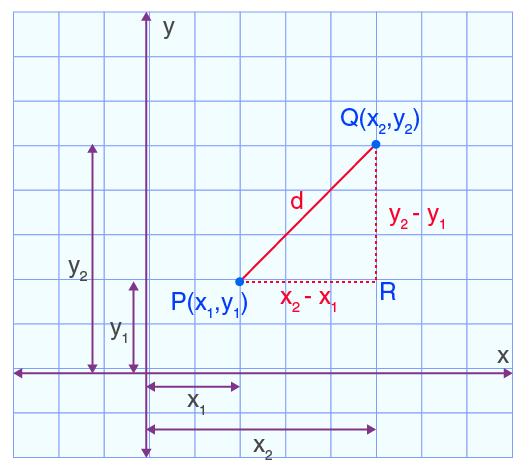

<center><i><u>Euclidean Distance where `x` is latititude and `y` is longitude</i></u></center>

This distance, 'as the crow flies', is referred to as the Euclidean Distance and it is only a rough approximation of the distance between two points on a map.  It is not the precise geographic distance.

In [ ]:
import numpy as np

# We define a function that will take as input a dataframe df
# and returns back a new column. This function computes
# the distance (in miles) from CityTech, given the lat/lon of the
# other location
def distance(df):
  CityTech_lat = 40.6973
  CityTech_lon = -73.9861

  # The calculation below is simply the Pythagorean theorem.
  # The normalizing values are just for converting lat/lon differences
  # to miles
  distance = ((df.Latitude-CityTech_lat)/0.0146)**2 + ((df.Longitude-CityTech_lon)/0.0196)**2
  return np.sqrt(distance)

# This function combines STREET/BUILDING/BORO/ZIPCODE columns into one address
def combine_address(df):
  return (df.BUILDING + ' ' + df.STREET + ', '  + df.ZIPCODE).str.upper()

In [ ]:
# First, let's use the `assign` function to create two new columns
# using the logic in the functions above,
(
  restaurants
  .assign(
      distance_from_CityTech = distance,
      address = combine_address
  )
  .filter(items = ['DBA','address','distance_from_CityTech'])
)

In [ ]:
# And let's eliminate duplicates and sort by distance
(
  restaurants
  .assign(
      distance_from_CityTech = distance,
      address = combine_address
  )
  .filter(items = ['DBA','address','distance_from_CityTech'])
  .query('distance_from_CityTech > 0') # eliminates NaN values from distance_from_CityTech
  .drop_duplicates()
  .sort_values('distance_from_CityTech')
  .head(20)
)



---



### Using the `apply` approach

The `apply` function allows the users to pass a function and apply it on every single row or column of a Pandas dataframe.

In [ ]:
!sudo pip3 install -q -U geopy

from geopy import distance

# A bit more accurate distance calculation, which returns back
# the distance in miles. However, we cannot pass a dataframe
# to the function but only individual values
def distance_from_CityTech_geodesic(row):
  CityTech_lon = -73.9861
  CityTech_lat = 40.6973
  CityTech = (CityTech_lat, CityTech_lon)
  rest = (row.Latitude, row.Longitude)
  #if pd.isnull(row.Latitude) or pd.isnull(row.Longitude):
  #  return None
  return distance.distance(CityTech, rest).miles


In [ ]:
# We now create a smaller version of the dataset with just
# the names/address/lon/lat of the restaurants
rest_names_locations = (
    restaurants
    .assign(
      address = combine_address
    )
    .filter(items = ['CAMIS','DBA','address','Longitude', 'Latitude'])
    .query(' Longitude==Longitude ') # idiomatic expression for saying IS NOT NULL
    .query(' Latitude==Latitude ') # idiomatic expression for saying IS NOT NULL
    .drop_duplicates()
)

rest_names_locations

In [ ]:
# We will now apply the function distance_from_CityTech_geodesic
# to every row of the dataset:
rest_names_locations.apply(distance_from_CityTech_geodesic, axis='columns')


In [ ]:
# We will now save the result into a new column
rest_names_locations['distance_from_CityTech']=rest_names_locations.apply(distance_from_CityTech_geodesic, axis='columns')

In [ ]:
# Let's see how many restaurants are within half a mile from CityTech :)
(
    rest_names_locations
    .query('distance_from_CityTech < 0.5')
    .sort_values('distance_from_CityTech')
)



---



## Aggregation Function -- `agg()`

In [ ]:
restaurants['SCORE'].agg('mean')

In [ ]:
restaurants['SCORE'].agg(['mean','std','count','nunique'])

In [ ]:
restaurants.agg(
    {
        'SCORE': ['mean','std','count','nunique'],
        'CAMIS':  ['nunique','count']
     }
    )

In [ ]:
restaurants.agg(
        num_scored_violations = ('SCORE', 'count'),
        mean_score = ('SCORE', 'mean'),
        std_score  = ('SCORE', 'std'),
        num_entries = ('CAMIS',  'count'),
        num_restaurants = ('CAMIS',  'nunique'),
  )

## Calculating aggegates per groups -- `groupby()`

In [ ]:
restaurants.groupby('GRADE DATE').agg({'SCORE': 'mean'})

In [ ]:
(
  restaurants
  .groupby('GRADE DATE')
  .agg(
      score_mean = ('SCORE', 'mean'),
      graded_restaurants = ('CAMIS', 'nunique')
    )
  .tail(500)
  .head(20)
)



---



## Pivot Tables

[Pivot tables](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html) are one of the most commonly used exploratory tools, and in Pandas they are extremely flexible.

For example, let's try to count the number of restaurants that are inspected every day.

In [ ]:
# Count the number of CAMIS values that appear on each date

pivot = pd.pivot_table(
    data=restaurants,
    index="GRADE DATE",  # specifies the rows
    values="CAMIS",  # specifies the content of the cells
    aggfunc="count",  # we ask to count how many different CAMIS values we see
)

In [ ]:
pivot

#### Changing date granularity

We can also use the [resample](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html) command to change the frequency from one day, to, say, 7 days. Then we can compute, say, the average (`mean()`) for these days, or the total number (`sum()`) of inspections.

In [ ]:
pivot.resample("1W").sum().tail(100)

#### Pivot Table with two (or more) variables)

We would like to break down the results by borough, so we add the `column` parameter.

In [ ]:
pivot2 = pd.pivot_table(
    data=restaurants,  #
    index="INSPECTION DATE",
    columns="BORO",
    values="CAMIS",
    aggfunc="count",
)
pivot2.head(10)

##### Deleting rows and columns

Now, you will notice that there are a few columns and rows that are just noise. The first row with date *'1900-01-01'* is clearly noise, and the *'0'* column is also noise. We can use the `drop` command in Pandas to drop these.

In [ ]:
# The axis='index' (or axis=0) means that we delete a row with that index value
pivot2 = pivot2.drop(pd.to_datetime("1900-01-01"), axis="index")

In [ ]:
# The axis='columns' (or axis=1) means that we delete a columns with that value
pivot2 = pivot2.drop("0", axis="columns")

In [ ]:
pivot2.tail(5)

## (Optional, FYI) Advanced Pivot Tables

We can also add multiple attributes in the index and columns. It is also possible to have multiple aggregation functions, and we can even define our own aggregation functions.

In [ ]:
# We write a function that returns the
# number of unique items in a list x
def count_unique(x):
    return len(set(x))


# We break down by BORO and GRADE, and also calculate
# inspections in unique (unique restaurants)
# and non-unique entries (effectuvely, violations)
pivot_advanced = pd.pivot_table(
    data=restaurants,  #
    index="GRADE DATE",
    columns=["BORO", "GRADE"],
    values="CAMIS",
    aggfunc=["count", count_unique],
)

# Take the total number of inspections (unique and non-unique)
agg = pivot_advanced.resample("1M").sum()

# Show the last 5 entries and show the transpose (.T)
agg.tail().T



---



# Exercises

## Exercise 1 - Average Score by Inspector

Now let's do the same exercise, but instead of counting the number of inspections, we want to compute the average score assigned by the inspectors. Hint: We will need to change the `values` and the `aggfunc` parameters in the `pivot_table` function above.

In [ ]:
# your code here

#### Solution 1 - Average Score by Inspector

In [ ]:
pivot = pd.pivot_table(
    data=restaurants,
    index="INSPECTION DATE",  # specifies the rows
    values="SCORE",  # specifies the content of the cells
    aggfunc="mean",  # compute the average SCORE
)



---

